In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Loan_Predict.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
data.describe(include = 'object').T

,count,unique,top,freq
Loan_ID,614,614,LP001002,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [7]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [8]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [10]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

C:\Users\Saniddha Ghosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Saniddha Ghosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Saniddha Ghosh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


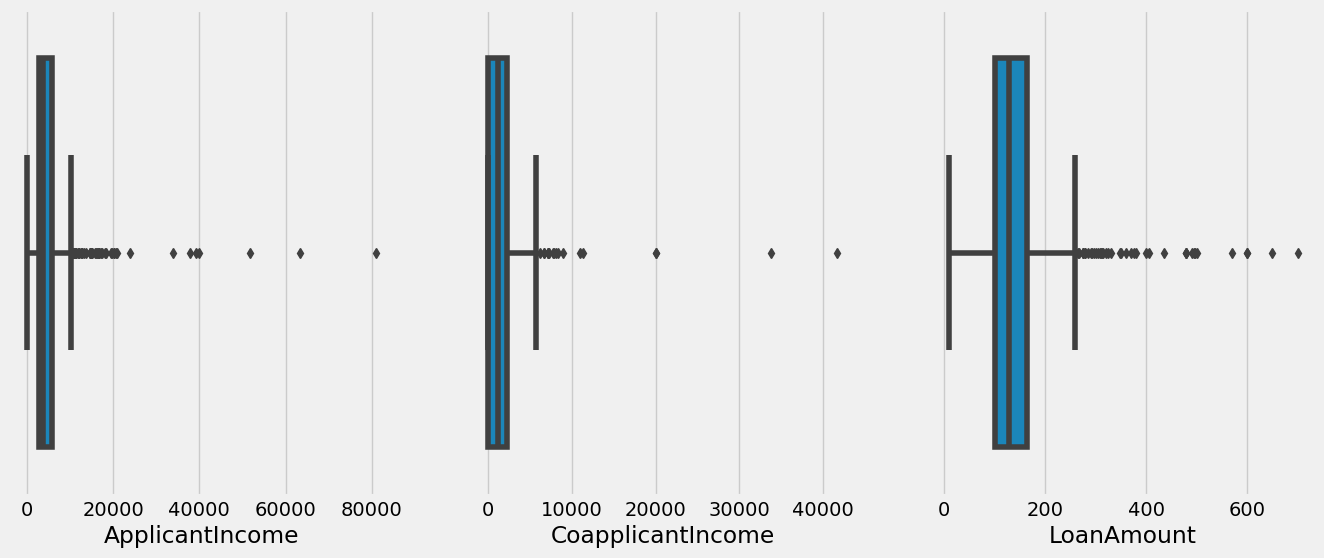

In [11]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,6)

plt.subplot(1,3,1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(data['LoanAmount'])

plt.show()

In [12]:
print('Before Removing the outliers', data.shape)

data = data[data['ApplicantIncome'] < 25000]

print('Before Removing the outliers', data.shape)

Before Removing the outliers (614, 13)
Before Removing the outliers (607, 13)


In [13]:
print('Before Removing the outliers', data.shape)

data = data[data['CoapplicantIncome'] < 12000]

print('Before Removing the outliers', data.shape)

Before Removing the outliers (607, 13)
Before Removing the outliers (603, 13)


In [14]:
print('Before Removing the outliers', data.shape)

data = data[data['LoanAmount'] < 400]

print('Before Removing the outliers', data.shape)

Before Removing the outliers (603, 13)
Before Removing the outliers (591, 13)


C:\Users\Saniddha Ghosh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Saniddha Ghosh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Saniddha Ghosh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

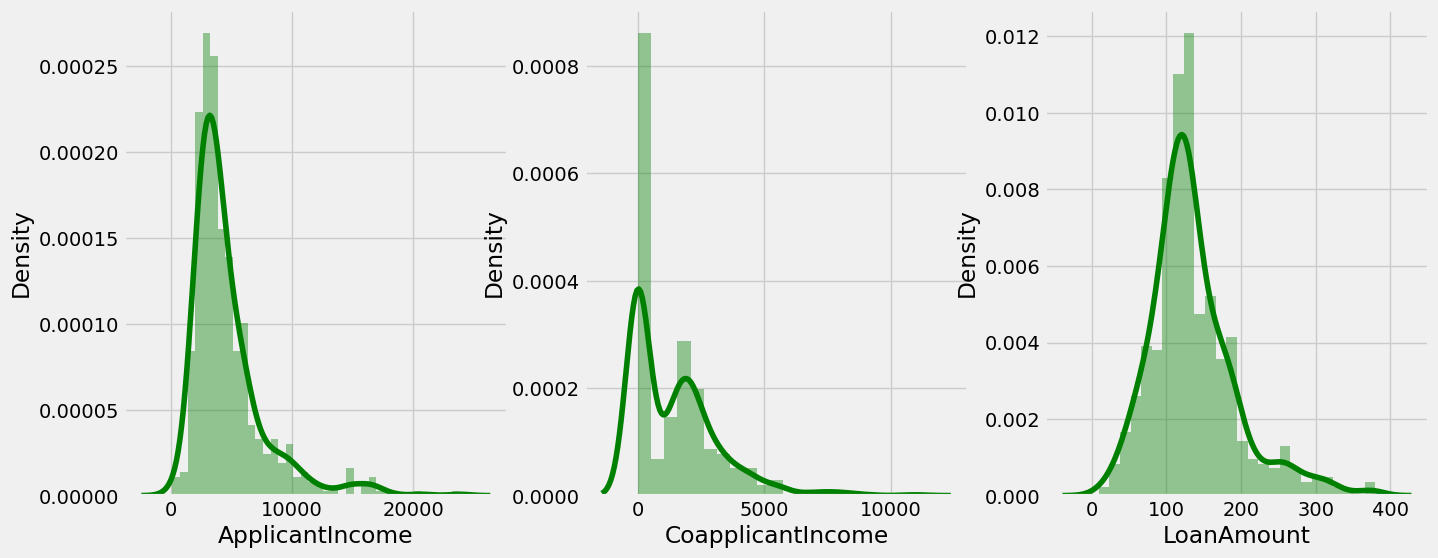

In [15]:
plt.subplot(1,3,1)
sns.distplot(data['ApplicantIncome'], color = 'green')

plt.subplot(1,3,2)
sns.distplot(data['CoapplicantIncome'], color = 'green')

plt.subplot(1,3,3)
sns.distplot(data['LoanAmount'], color = 'green')

C:\Users\Saniddha Ghosh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Saniddha Ghosh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Saniddha Ghosh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility)

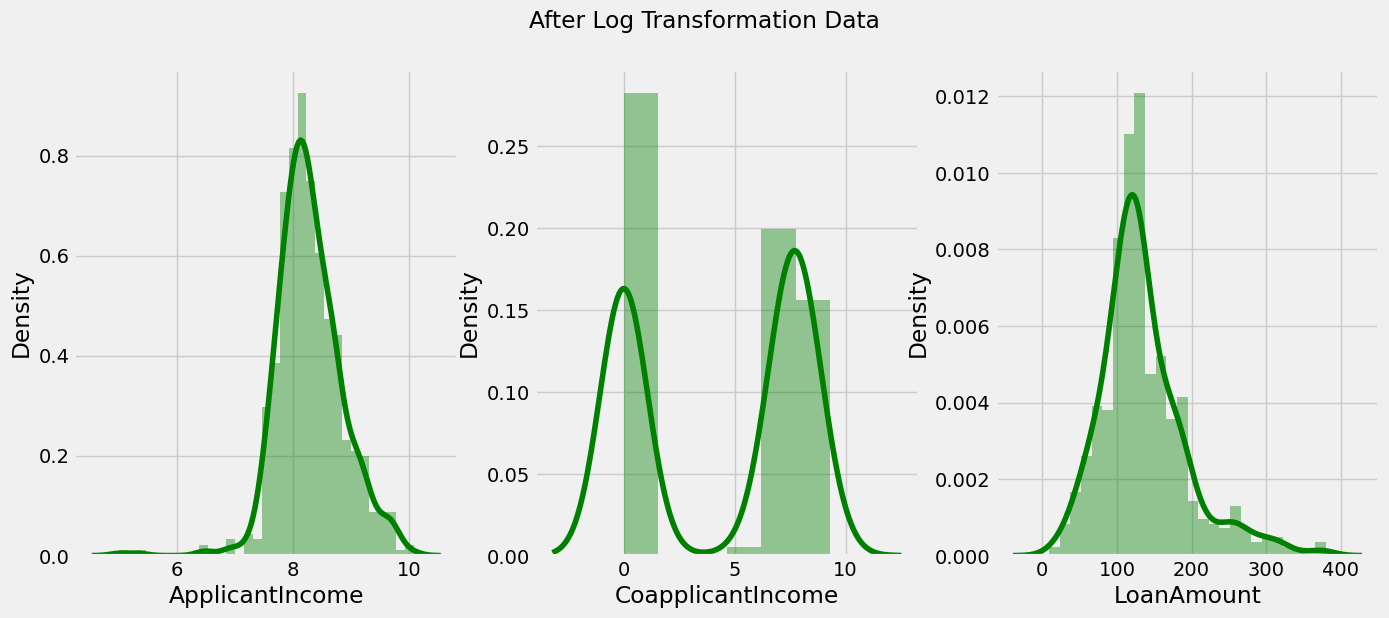

In [16]:
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log1p(data['CoapplicantIncome'])

plt.subplot(1,3,1)
sns.distplot(data['ApplicantIncome'], color = 'green')

plt.subplot(1,3,2)
sns.distplot(data['CoapplicantIncome'], color = 'green')

plt.subplot(1,3,3)
sns.distplot(data['LoanAmount'], color = 'green')

plt.suptitle("After Log Transformation Data")
plt.show()

In [17]:
num = data.select_dtypes('number').columns.tolist()
cat = data.select_dtypes('object').columns.tolist()

In [18]:
 num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [19]:
cat

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

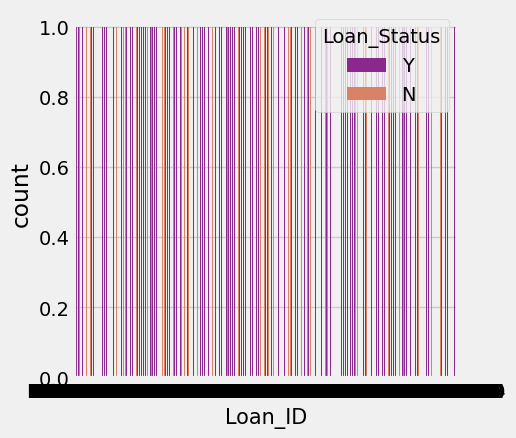

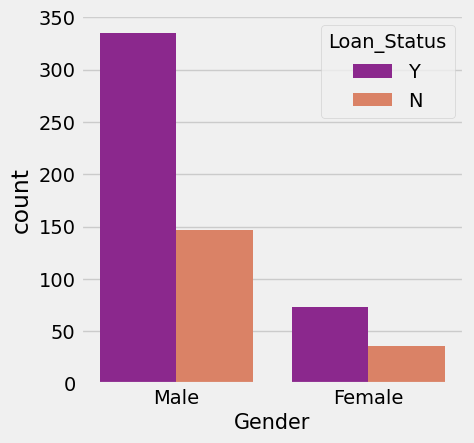

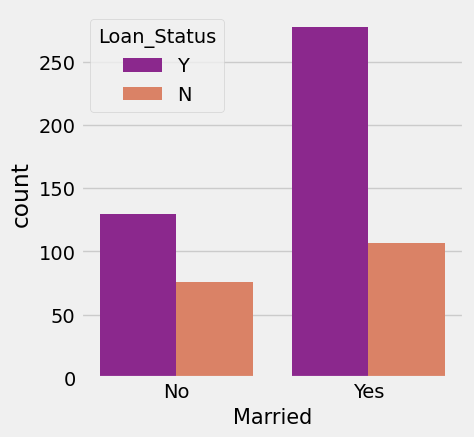

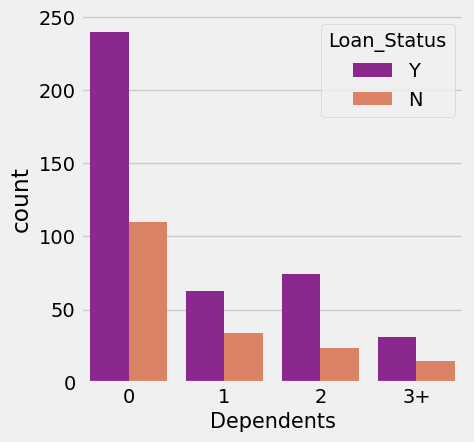

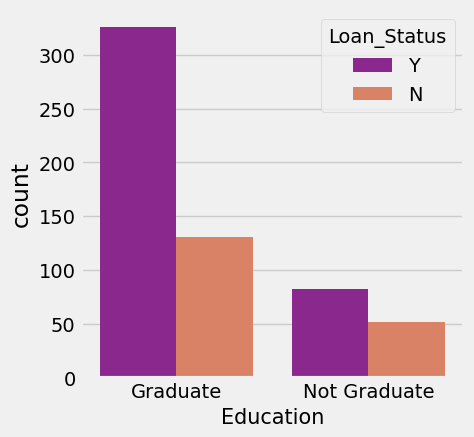

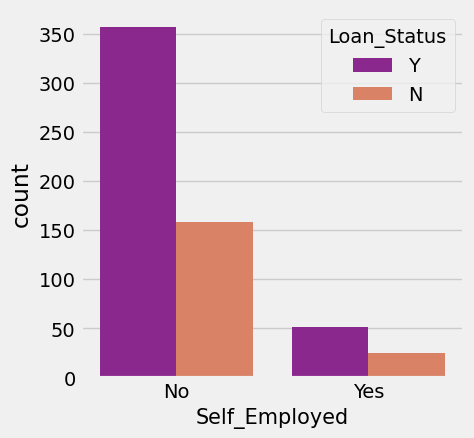

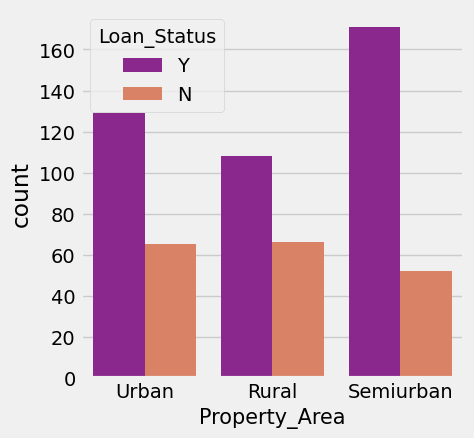

In [20]:
for i in cat[:-1]:
    plt.figure(figsize = (15,10))
    plt.subplot(2,3,1)
    sns.countplot( x = i, hue = 'Loan_Status', data = data, palette = 'plasma')
    plt.xlabel(i, fontsize = 15)

In [21]:
data = data.drop(['Loan_ID'], axis  = 1)

In [22]:
data['Gender'] = data['Gender'].replace(('Male','Female'),(1,0))
data['Married'] = data['Married'].replace(('Yes','No'),(1,0))
data['Education'] = data['Education'].replace(('Graduate','Not Graduate'),(1,0))

In [23]:
data['Self_Employed'] = data['Self_Employed'].replace(('Yes','No'),(1,0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y','N'),(1,0))
data['Property_Area'] = data['Property_Area'].replace(('Urban','Semiurban','Rural'),(1,1,0))
data['Dependents'] = data['Dependents'].replace(('0','1','2','3+'),(0,1,1,1))

In [24]:
#data.head()

In [25]:
y = data['Loan_Status']
x = data.drop(['Loan_Status'], axis = 1)

In [26]:
x.shape

(591, 11)

In [27]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [28]:
y.shape

(591,)

In [29]:
#from imblearn.over_sampling import SMOTE

In [30]:
#x_resample, y_resample = SMOTE().fit_resample(x,y.values.ravel())

In [31]:
#print(x_resample.shape)

In [32]:
#print(y_resample.shape)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [35]:
x_train.shape

(443, 11)

In [36]:
y_test.shape

(148,)

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [38]:
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [39]:
pipe = make_pipeline(lr)

In [40]:
pipe.fit(x_train,y_train)

C:\Users\Saniddha Ghosh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('logisticregression', LogisticRegression())])

In [41]:
y_pred = pipe.predict(x_test)

In [42]:
y_pred

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [43]:
#lr.fit(x_train,y_train)

In [44]:
#y_pred = lr.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
#print("Training Accuracy", lr.score(x_train, y_train))
#print("Test Accuracy", lr.score(x_test, y_test))

In [47]:
#from sklearn.metrics import classification_report

In [48]:
#print(classification_report(y_test, y_pred))

In [49]:
print("Model Accuracy = ", accuracy_score(y_pred, y_test))

Model Accuracy =  0.7905405405405406


In [50]:
model_pred = np.array([[1,1,1,0,0,3924,1733,148.0,360,1,1]])

In [51]:
prediction = lr.predict(model_pred)
print(prediction[0])

0


C:\Users\Saniddha Ghosh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [52]:
#import pickle

In [53]:
#pickle.dump(lr,open('model.pkl','wb'))

In [54]:
#model = pickle.load(open('model.pkl','rb'))
#print(model)

In [55]:
import joblib

In [56]:
joblib.dump(lr,'model.pkl')

['model.pkl']